# Projet de machine learning - recommendation de culture

# Preambule : Configuration de l'environnement et chargement du dataset

### Configuration de l'environnement

In [1]:
# Inportation des bibliotheques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importation des outils de scikit learn 
# Pretraitement des donnees 
from sklearn.preprocessing import StandardScaler
# pour diviser les donnees de test et d'entrainement 
from sklearn.model_selection import train_test_split

In [3]:
# configuration esthetique des graphiques
# L'arriere plan sera gris
sns.set_theme(style="whitegrid")
# La hauteur et largeur des figures graphiques
plt.rcParams['figure.figsize']= (15, 8)

### Chargement du dataset

In [4]:
# Nous chargeons les fichiers csv pour un dataframe pandas
# une bonne pratique est d'utiliser un bloc pour gerer les erreurs
try: 
    data=pd.read_csv('Crop_recommendation.csv')
    print( "Fichier  'Crop_recommendation.csv' charge avec succes")
    print(f"Le jeu de donnees contient {data.shape[0]} lignes et {data.shape[1]} colonnes")
except FileNotFoundError:
    print("Erreur : Le fichier 'Crop_recommendation.csv' n'a pas ete trouve.")
    data=None

Fichier  'Crop_recommendation.csv' charge avec succes
Le jeu de donnees contient 2200 lignes et 8 colonnes


## Etape 1: Analyse exploratoire des Donnees(EDA)

In [5]:
if data is not None:
    # ---1.1 Comprehension initiale
    print("\n---1.1.1 Apercu des 5 premieres lignes ---")
    print( data.head())



---1.1.1 Apercu des 5 premieres lignes ---
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [6]:
if data is not None:
    # ---1.1 Comprehension initiale
    print("\n---1.1.2 Informations ---")
    print( data.info())


---1.1.2 Informations ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [7]:
if data is not None:
    # ---1.1 Comprehension initiale
    print("\n---1.1.2 Statistiques descriptive ---")
    # .describe() donne un apercu rapide de la distribution des donnees numeriques
    print( data.describe())


---1.1.2 Statistiques descriptive ---
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   2

In [8]:
if data is not None:
    # ---1.2 Qualite des donnees
    print("/n---1.2.1 Verifications des valeurs manquantes ---")
    # un jeu de donnees sans valeurs manquantes est ideal
    print( data.isnull().sum())

/n---1.2.1 Verifications des valeurs manquantes ---
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [9]:
if data is not None:
    # ---1.2. qualite de donnees
    print("/n---1.2.2 Verifications des doublons ---")
    #les doublons peuvent diaiser le modele
    print(f"Nombres de lignes dupliques: {data.duplicated().sum()}")

/n---1.2.2 Verifications des doublons ---
Nombres de lignes dupliques: 0


In [10]:
if data is not None:
    # ---1.3 Analyse des variables cibles
    print("/n---1.3.3 Distribution de la variable cible 'label' ---")
    # Verifier l'equilibre des classses
    print(data['label'].value_counts())

/n---1.3.3 Distribution de la variable cible 'label' ---
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


## Etape 2 : Visualisatin des donnees


--- 2.1 Distribution des caracteristiques--- 


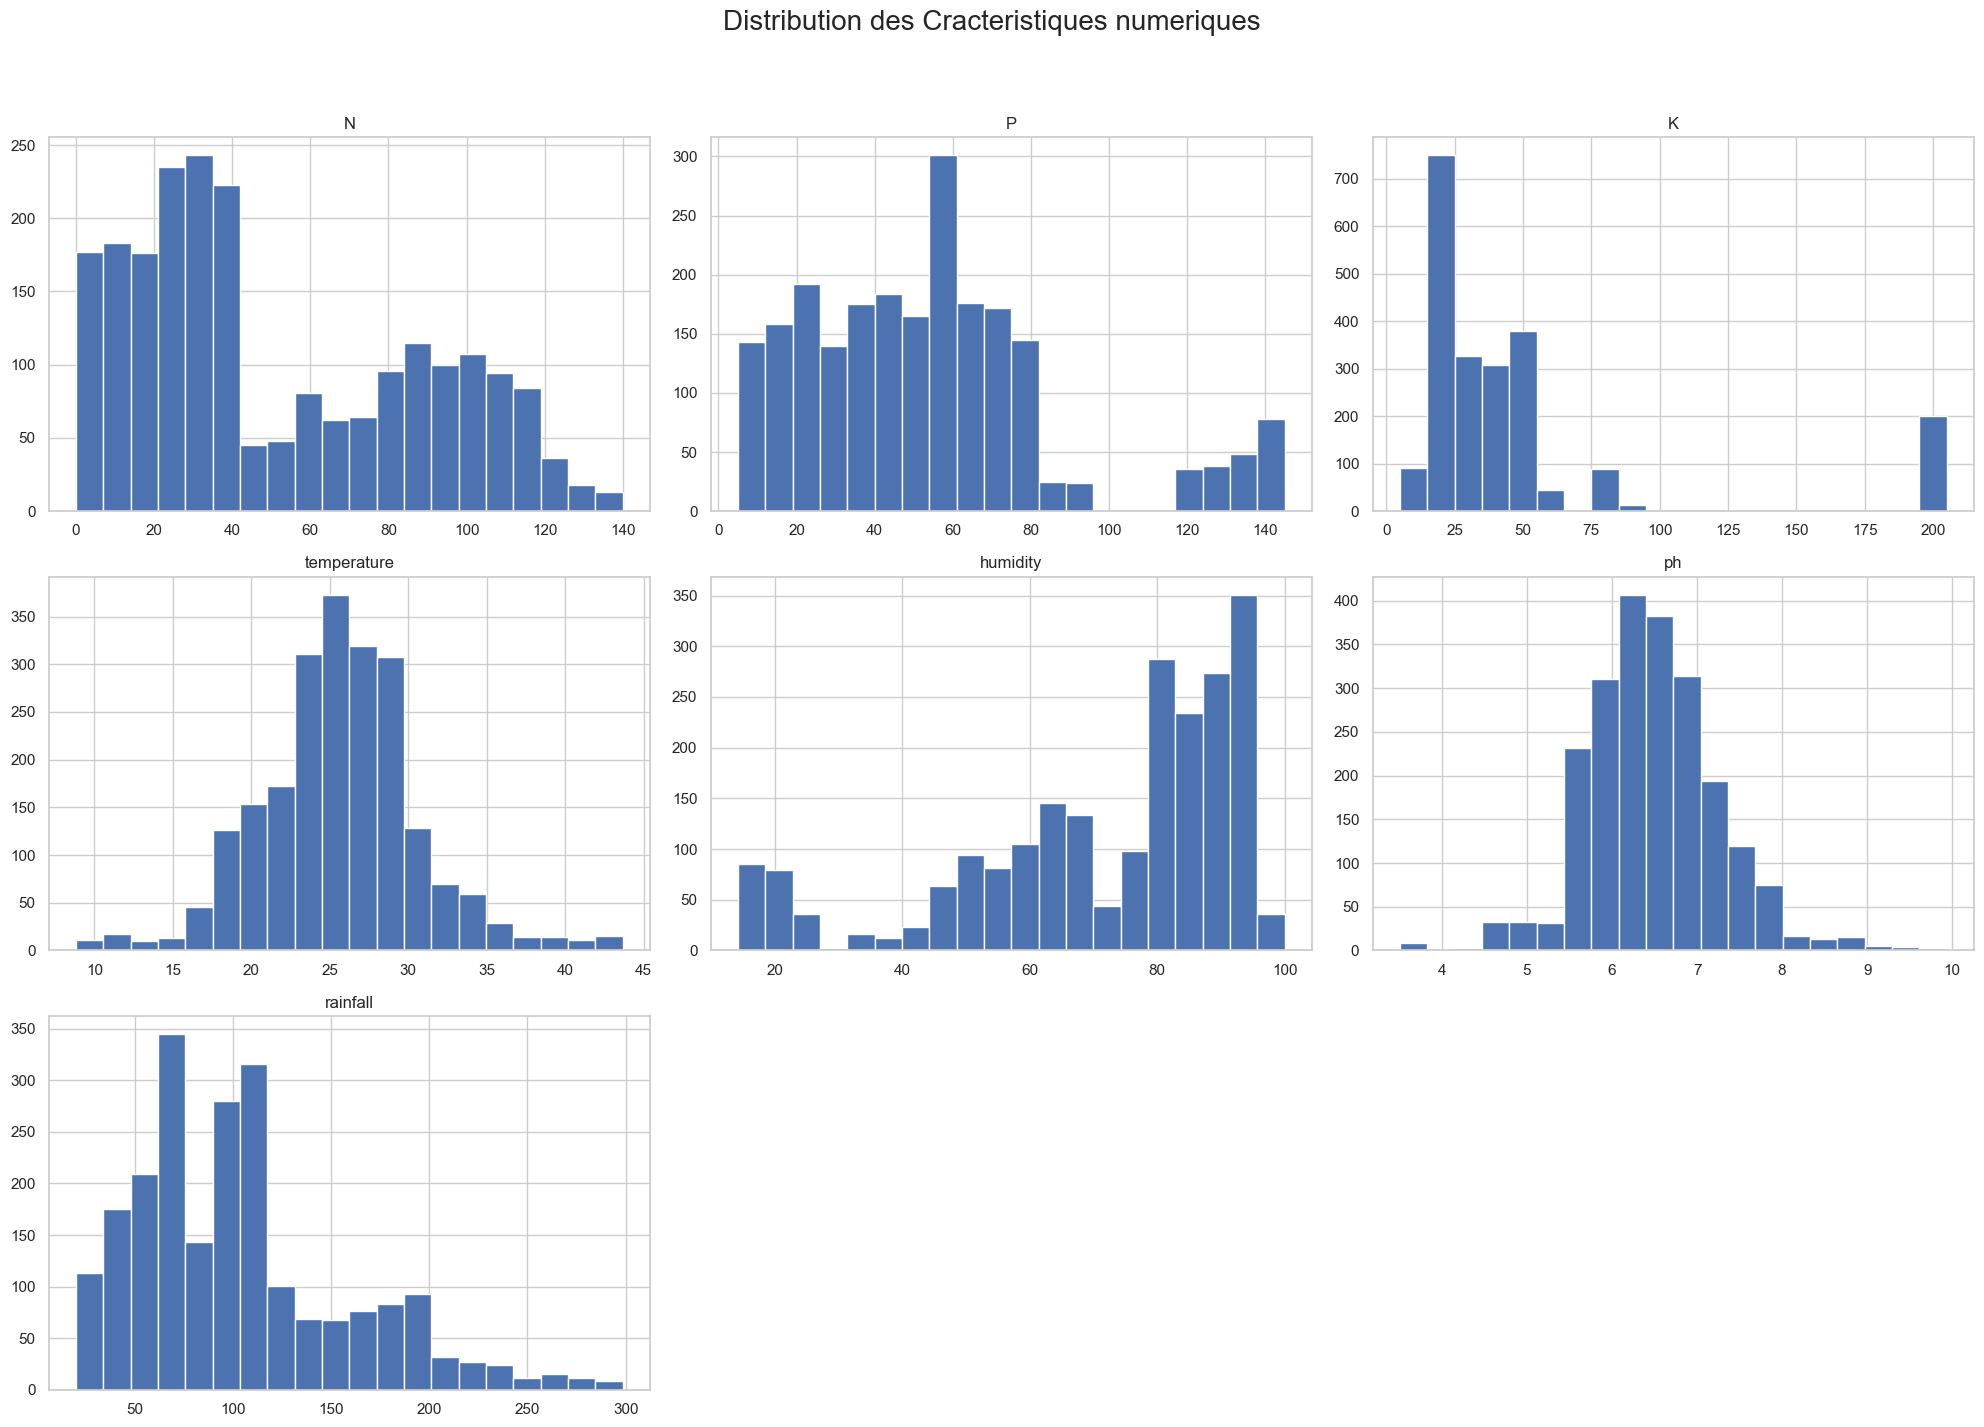

In [12]:
if data is not None:
    features = ['N', 'P','K','temperature','humidity','ph','rainfall']

    #--- 2.1 Distribution des caracteristiques numeriques
    print ("\n--- 2.1 Distribution des caracteristiques--- ")
    data[features].hist(bins=20, figsize=(20,15), layout=(3,3))
    plt.suptitle('Distribution des Cracteristiques numeriques', fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show


--- 2.2 Matrice de coorelation--- 


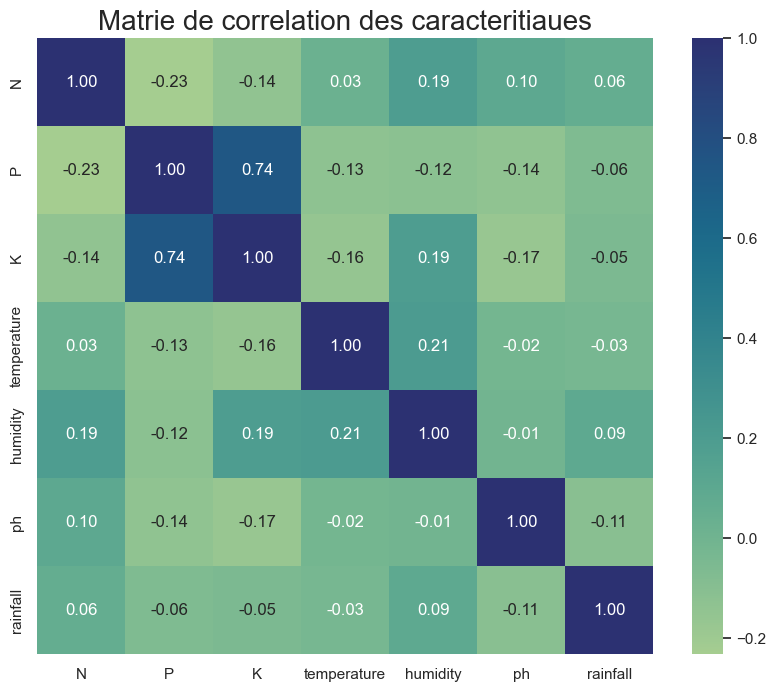

In [13]:
if data is not None:


    #--- 2.2 Distribution des caracteristiques numeriques
    print ("\n--- 2.2 Matrice de coorelation--- ")
    plt.figure(figsize=(10,8))
    correlation_matrix = data[features].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', square=True)
    plt.title('Matrie de correlation des caracteritiaues', fontsize=20)
    plt.show()

## Etape 3 :    Transformation et preparation des donnees


---Analyse des valeurs aberrantes (Outliers)---


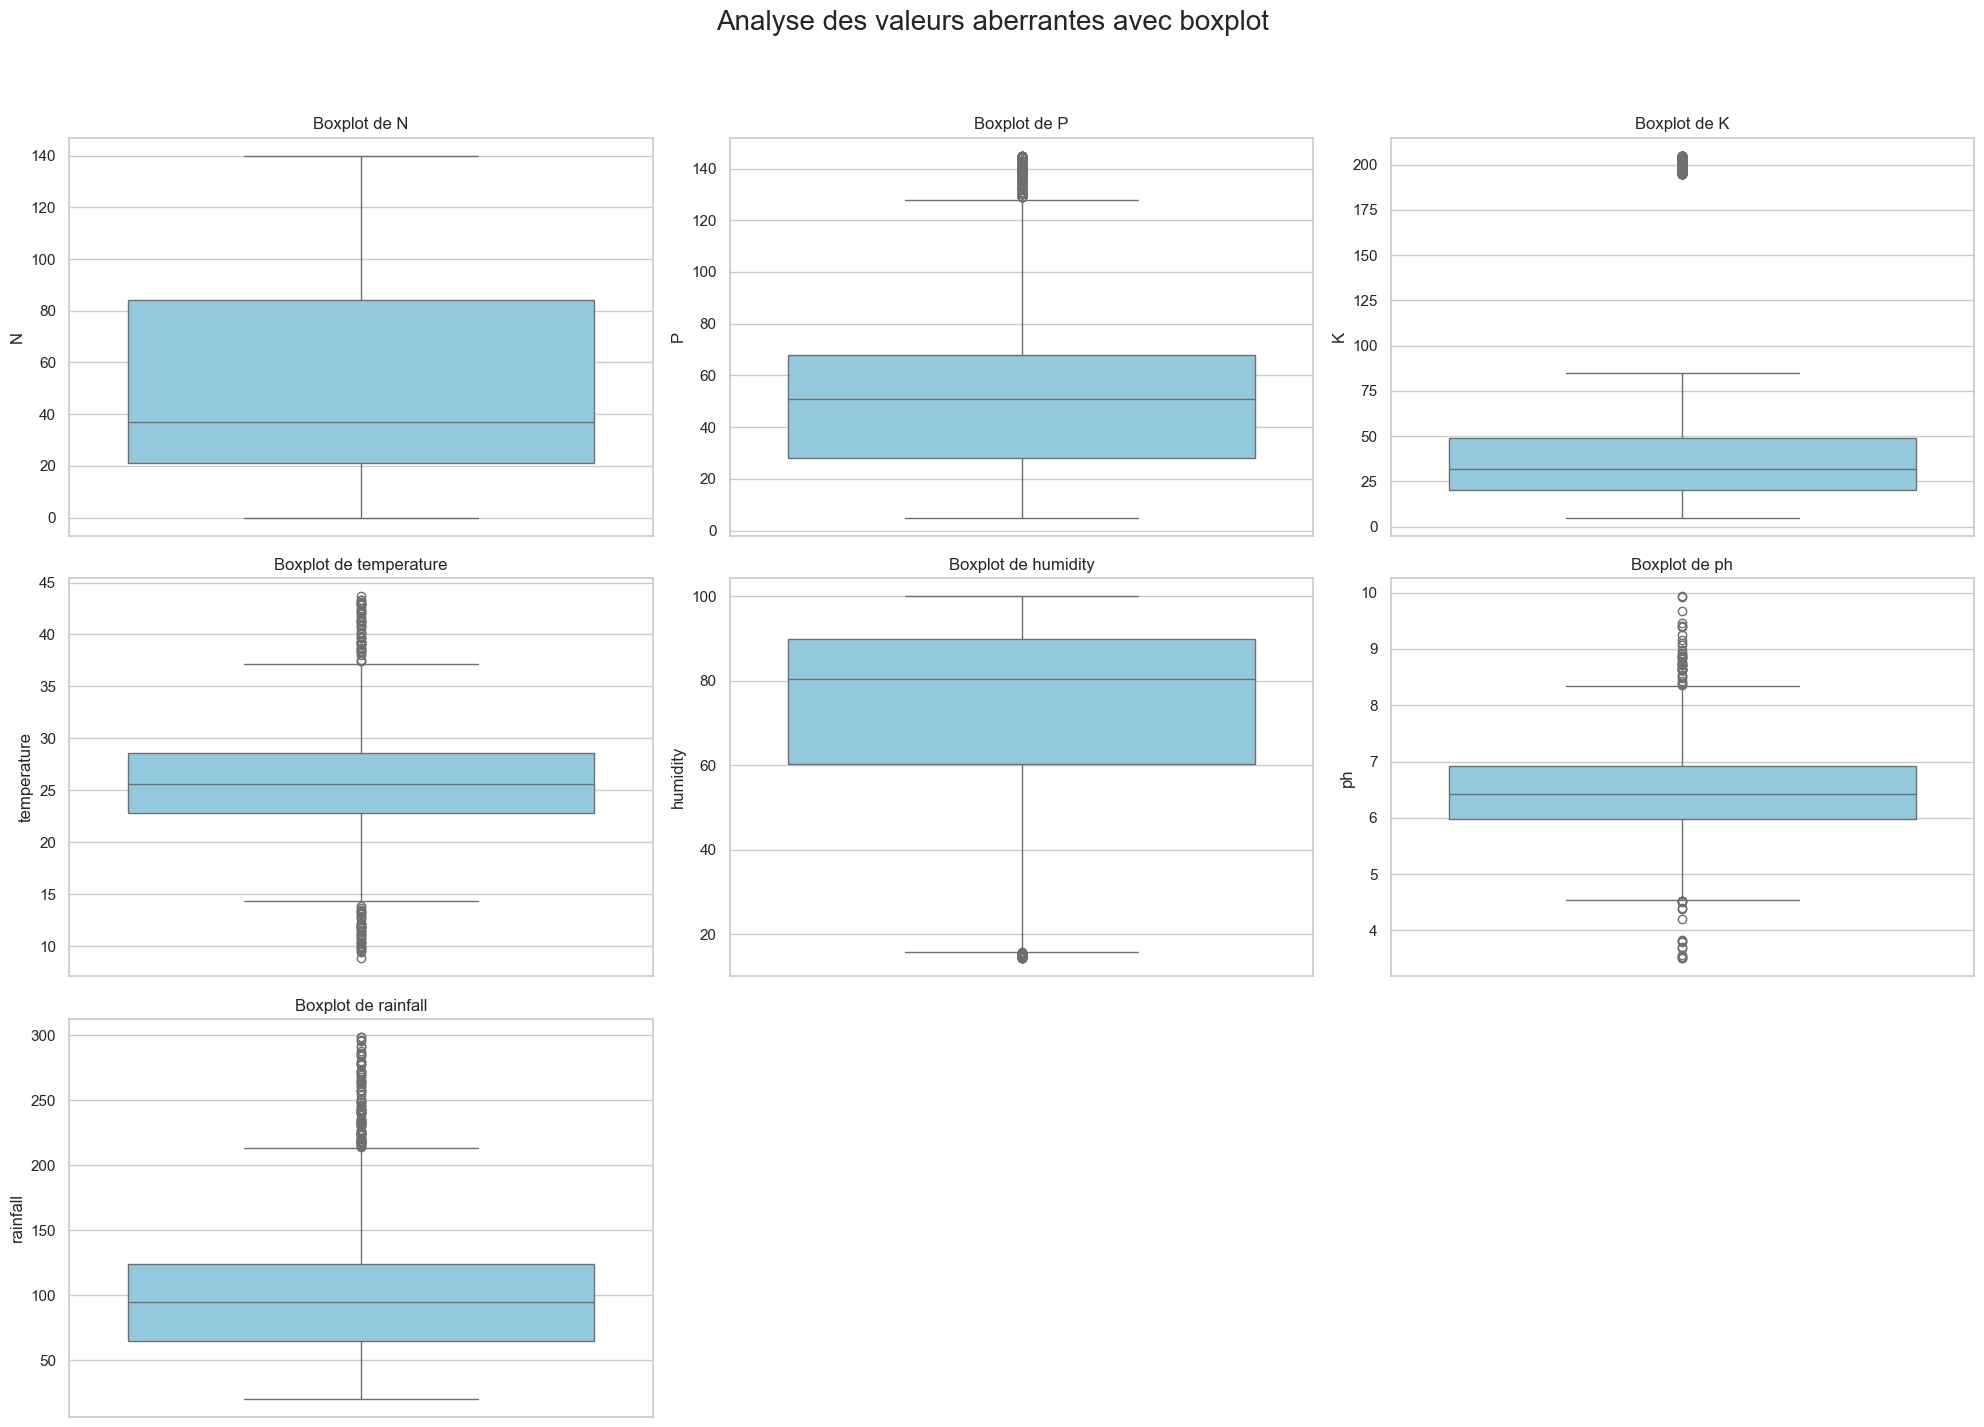

In [14]:
if data is not None:
  print("\n---Analyse des valeurs aberrantes (Outliers)---")
  plt.figure(figsize=(20,15))
  for i,features in enumerate(features):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=data[features],color='skyblue')
    plt.title(f'Boxplot de {features}')
  plt.suptitle('Analyse des valeurs aberrantes avec boxplot', fontsize=20)
  plt.tight_layout(rect=[0,0.03,1,0.95])
  plt.show()

## Etape 4: Ingenieurie des caracteristiques - Features engineering

In [15]:
if data is not None:
    print("\n\n" + "="*50)
    print("ÉTAPE 4 : INGÉNIERIE DES CARACTÉRISTIQUES")
    print("="*50)
    print("\n--- Création de nouvelles caractéristiques (ratios de nutriments) ---")
    
    # Ajout d'un petit epsilon pour éviter la division par zéro
    data['N_P_ratio'] = data['N'] / (data['P'] + 1e-6)
    data['N_K_ratio'] = data['N'] / (data['K'] + 1e-6)
    data['P_K_ratio'] = data['P'] / (data['K'] + 1e-6)
    
    print("Nouvelles colonnes de ratios créées.")
    print(data[['N', 'P', 'K', 'N_P_ratio', 'N_K_ratio', 'P_K_ratio']].head())



ÉTAPE 4 : INGÉNIERIE DES CARACTÉRISTIQUES

--- Création de nouvelles caractéristiques (ratios de nutriments) ---
Nouvelles colonnes de ratios créées.
    N   P   K  N_P_ratio  N_K_ratio  P_K_ratio
0  90  42  43   2.142857   2.093023   0.976744
1  85  58  41   1.465517   2.073171   1.414634
2  60  55  44   1.090909   1.363636   1.250000
3  74  35  40   2.114286   1.850000   0.875000
4  78  42  42   1.857143   1.857143   1.000000


## Etape 5 : Analyse Multivariee approfondi PCA



ÉTAPE 5 : ANALYSE MULTIVARIÉE APPROFONDIE (PCA)

--- Réduction de dimension avec l'Analyse en Composantes Principales (ACP) ---
Variance expliquée par PC1 : 26.94%
Variance expliquée par PC2 : 19.40%
Variance totale expliquée : 46.34%


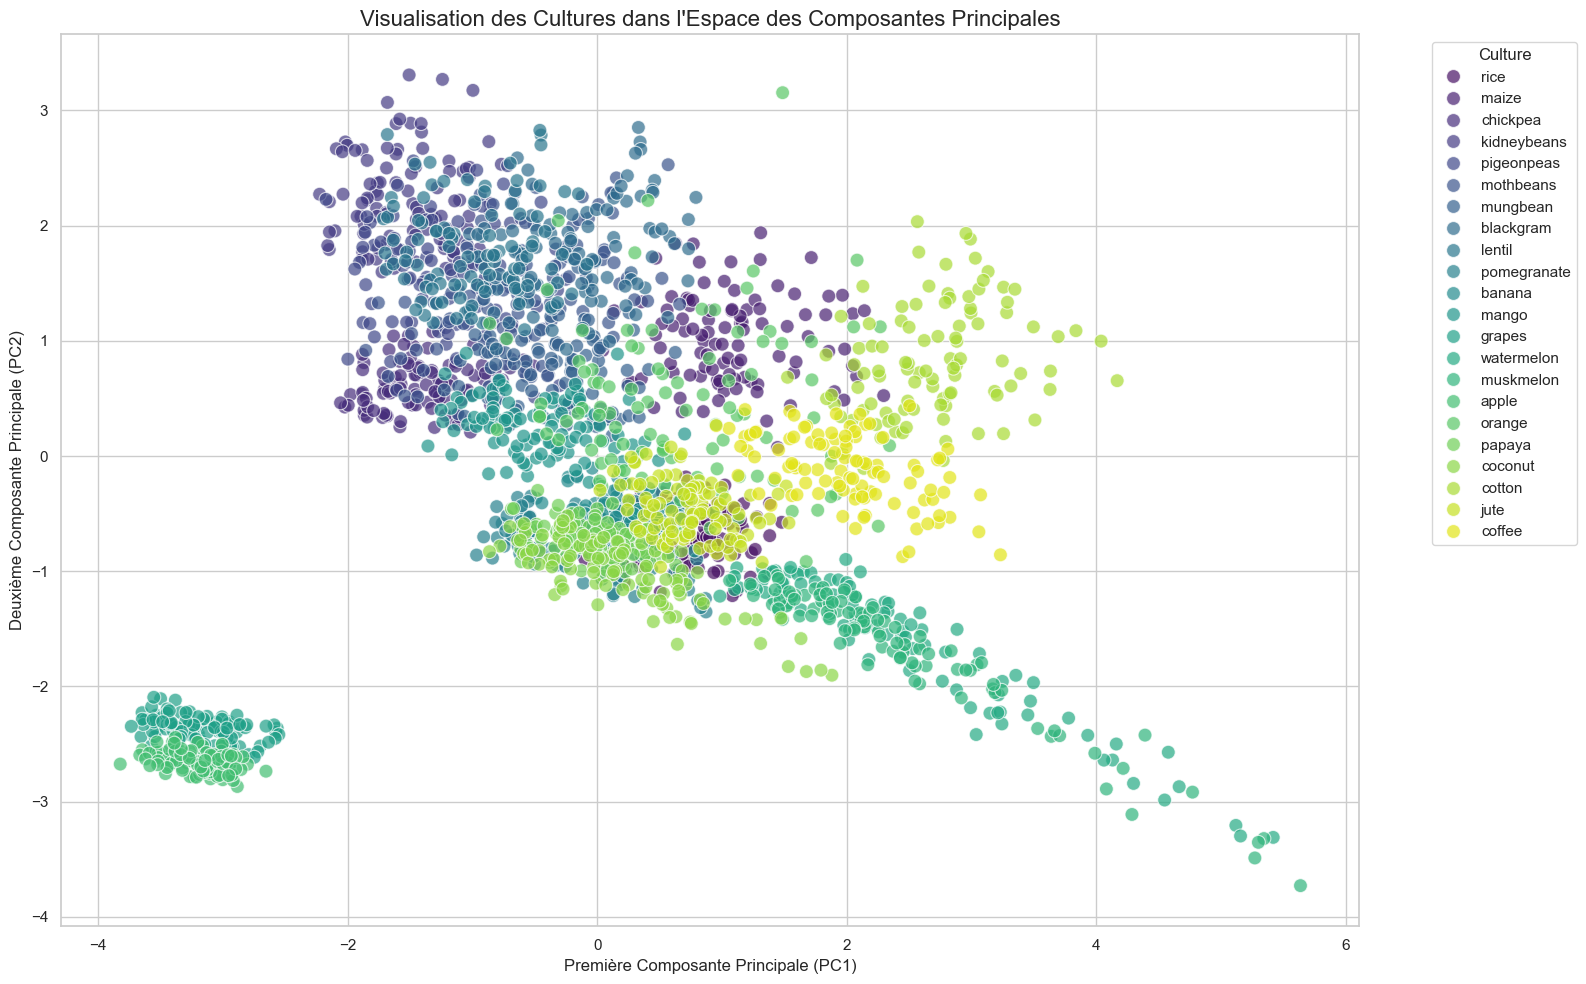

In [17]:
# ==============================================================================
from sklearn.decomposition import PCA


if data is not None:
    print("\n\n" + "="*50)
    print("ÉTAPE 5 : ANALYSE MULTIVARIÉE APPROFONDIE (PCA)")
    print("="*50)
    print("\n--- Réduction de dimension avec l'Analyse en Composantes Principales (ACP) ---")

    # Séparation des features et de la cible
    X = data.drop('label', axis=1)
    y = data['label']

    # Standardisation des données (étape indispensable pour l'ACP)
    scaler_pca = StandardScaler()
    X_scaled = scaler_pca.fit_transform(X)

    # Application de l'ACP pour réduire à 2 dimensions
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_scaled)

    # Création du DataFrame pour les résultats PCA
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)  # assure la bonne concaténation

    # Affichage de la variance expliquée
    print(f"Variance expliquée par PC1 : {pca.explained_variance_ratio_[0]:.2%}")
    print(f"Variance expliquée par PC2 : {pca.explained_variance_ratio_[1]:.2%}")
    print(f"Variance totale expliquée : {sum(pca.explained_variance_ratio_):.2%}")

    # Visualisation des résultats
    plt.figure(figsize=(16, 10))
    sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, palette='viridis', alpha=0.7, s=100)
    plt.title("Visualisation des Cultures dans l'Espace des Composantes Principales", size=16)
    plt.xlabel("Première Composante Principale (PC1)")
    plt.ylabel("Deuxième Composante Principale (PC2)")
    plt.legend(title='Culture', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
